## O Danych

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('25__iris.csv', sep=",")
#pd.options.display.max_rows = None 
df

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



## Ogólny przegląd danych

Zbiór danych skłąda sie z 5 kolumn. 4 pierwsze kolumny zwierają liczby zmiennoprzecinkowe. Ostatnia kolumna zwiera ciągi znaków. Zbiór nie zawiera brakującyh wartości. Zbiór zawiera 3 zduplikowane rzędy ale nie będziemy w to ingerować bo jest jak najbardziej możliwe uzyskanie tych samych pomiarów z dwóch różnych prób(kwiatków).

Mówiąc najprościej dane są czyste i nie wymagają obróbki - dobry początek.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   długość kielicha (sepal length)   150 non-null    float64
 1   szerokość kielicha (sepal width)  150 non-null    float64
 2   długość płatka (petal length)     150 non-null    float64
 3   szerokość płatka (petal width)    150 non-null    float64
 4   klasa (class)                     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isnull().sum()

długość kielicha (sepal length)     0
szerokość kielicha (sepal width)    0
długość płatka (petal length)       0
szerokość płatka (petal width)      0
klasa (class)                       0
dtype: int64

In [5]:
df.duplicated().sum() 

3

In [6]:
df[df.duplicated()]

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


## Krótko o pojedynczych zmiennych


Po przygotowaniu danych i analizie podstawowych średnich wartości każdej z klas widzimy wyraźnie że poszczególne gatunki Irysa różnią sie między sobą wymiarami. Różnice są najbardziej wyraźne kiedy porównamy długość i szerokość płatka. Wykresy poniżej.
W następnym etapie naszej analizy sprwdzimy czy te różnice występują w całej próbie.

In [7]:
#Na początek zmienimy sobie nazwy kolumn żeby łatwuej nam się pracowało:
df.columns = ['dl kielicha', 'sz kielicha', 'dl platka', 'sz platka', 'klasa']

#Sprawdźmy jak to wygląda:
df.head(1)

,dl kielicha,sz kielicha,dl platka,sz platka,klasa
0,5.1,3.5,1.4,0.2,Iris-setosa


In [8]:
#Wyciągnijmy teraz średnią wartość wszytkich czterech zmiennych
df0 = df.groupby('klasa', as_index=False).mean({'dl kielicha', 'sz kielicha', 'dl platka', 'sz platka', 'klasa'})
df0

,klasa,dl kielicha,sz kielicha,dl platka,sz platka
0,Iris-setosa,5.006,3.418,1.464,0.244
1,Iris-versicolor,5.936,2.770,4.260,1.326
2,Iris-virginica,6.588,2.974,5.552,2.026


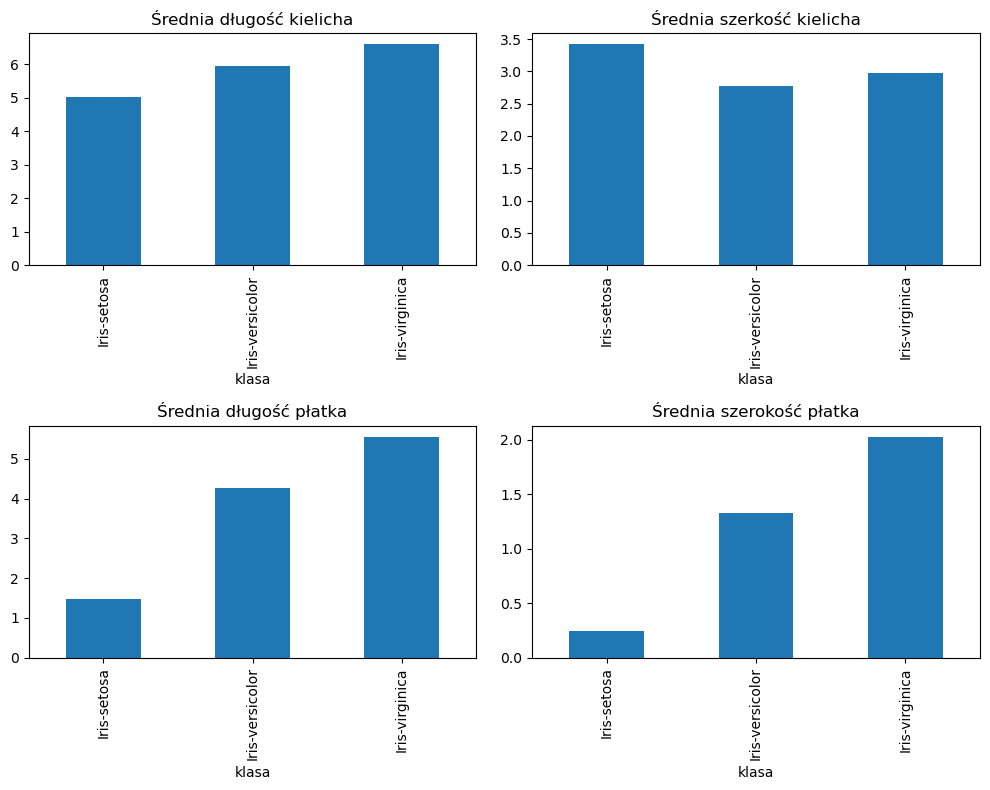

In [9]:
# Narysujmy proste wykresy tego co jest powyżej
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

df0.plot(kind='bar', x='klasa', y='dl kielicha', ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Średnia długość kielicha')

df0.plot(kind='bar', x='klasa', y='sz kielicha', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Średnia szerkość kielicha')

df0.plot(kind='bar', x='klasa', y='dl platka', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Średnia długość płatka')

df0.plot(kind='bar', x='klasa', y='sz platka', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Średnia szerokość płatka')


plt.tight_layout()
plt.show()

                            

## Relacje między zmiennymi
Na tym etapie dokonamy bardziej dogłębnej analizy i zobaczymy czy ida się powierdzić wnioski i obesrwacje z poprzedniego etapu.

In [10]:
# Wyciągnijmy medianę oraz wartości maxymalne i minimalne dla każdej zmiennej
df1 = df.groupby('klasa', as_index=False).agg({
    'dl kielicha': ['min', 'median','max'],
    'sz kielicha': ['min', 'median','max'],
    'dl platka': ['min', 'median','max' ],
    'sz platka': ['min', 'median','max' ],
})
df1

klasa dl kielicha             sz kielicha             dl platka  \
                           min median  max         min median  max       min   
0      Iris-setosa         4.3    5.0  5.8         2.3    3.4  4.4       1.0   
1  Iris-versicolor         4.9    5.9  7.0         2.0    2.8  3.4       3.0   
2   Iris-virginica         4.9    6.5  7.9         2.2    3.0  3.8       4.5   

              sz platka              
  median  max       min median  max  
0   1.50  1.9       0.1    0.2  0.6  
1   4.35  5.1       1.0    1.3  1.8  
2   5.55  6.9       1.4    2.0  2.5

In [11]:
# zmieńmy jeszcze raz nazwy kolumn, aby pozbyć się wielopoziomowego indeksu
df1.columns = ['klasa', 'dl kielicha min', 'dl kielicha median', 'dl kielicha max',
                   'sz kielicha min', 'sz kielicha median', 'sz kielicha max', 
                  'dl platka min', 'dl platka median', 'dl platka max',
                  'sz platka min', 'sz platka median', 'sz platka max']
df1

,klasa,dl kielicha min,dl kielicha median,dl kielicha max,sz kielicha min,sz kielicha median,sz kielicha max,dl platka min,dl platka median,dl platka max,sz platka min,sz platka median,sz platka max
0,Iris-setosa,4.3,5.0,5.8,2.3,3.4,4.4,1.0,1.50,1.9,0.1,0.2,0.6
1,Iris-versicolor,4.9,5.9,7.0,2.0,2.8,3.4,3.0,4.35,5.1,1.0,1.3,1.8
2,Iris-virginica,4.9,6.5,7.9,2.2,3.0,3.8,4.5,5.55,6.9,1.4,2.0,2.5


Na wykresie widzimy wyrażnie róznice w wymiarach pomiędzy poszczególnymi gatunkami Irysa. Setosa ma wyraznie mniejszy płatek zarówno pod wzgeldam długości i szerokości. Dwa pozostałe gatunki różnią sie od siebie jedynie nieznaczne - w taki sposób ze  versicolor ma odrobinę miniejszy płatek od virginica.

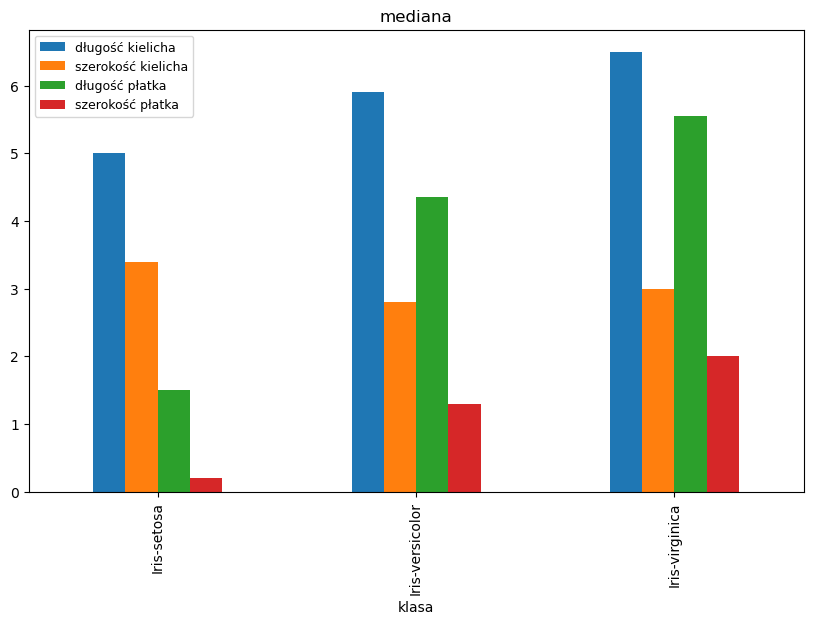

In [12]:
#Narysujmy 3 wykresy ukazujące medianę oraz wartości minimalne i maksymalne poszczególnych zmiennych dla każdej z klas 

fig, ax = plt.subplots(figsize=(10, 6))  # Define a single plot
df1.plot(
    kind='bar',
    x='klasa',
    y=['dl kielicha median', 'sz kielicha median', 'dl platka median', 'sz platka median'],
    ax=ax,
    title='mediana',
    legend=False
)

# Add a custom legend
ax.legend(['długość kielicha', 'szerokość kielicha', 'długość płatka', 'szerokość płatka'], fontsize=9)

# Show the plot
plt.show()


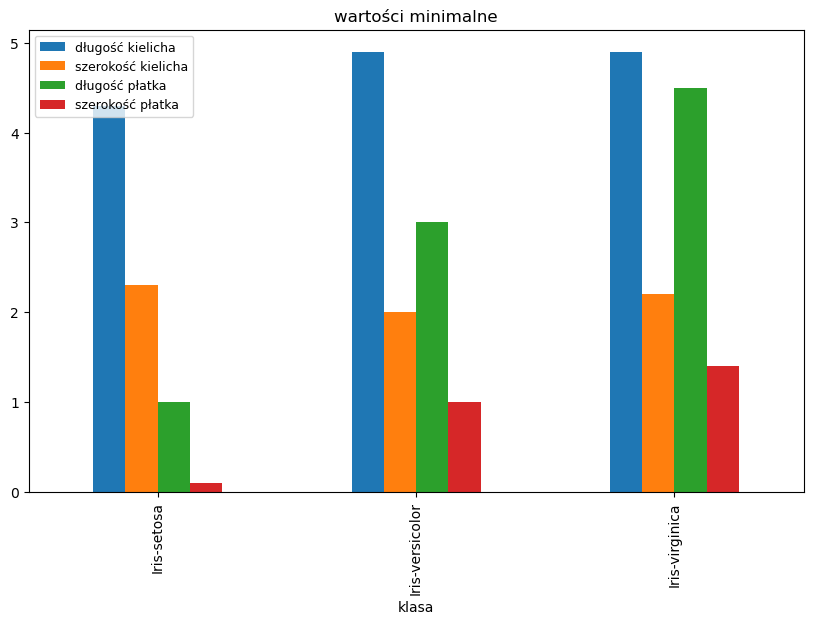

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))  # Define a single plot
df1.plot(kind='bar', x='klasa', y=['dl kielicha min', 'sz kielicha min','dl platka min',
                                   'sz platka min',],ax=ax, title='wartości minimalne', legend=False)
ax.legend(['długość kielicha', 'szerokość kielicha', 'długość płatka', 'szerokość płatka'],fontsize=9)
plt.show()

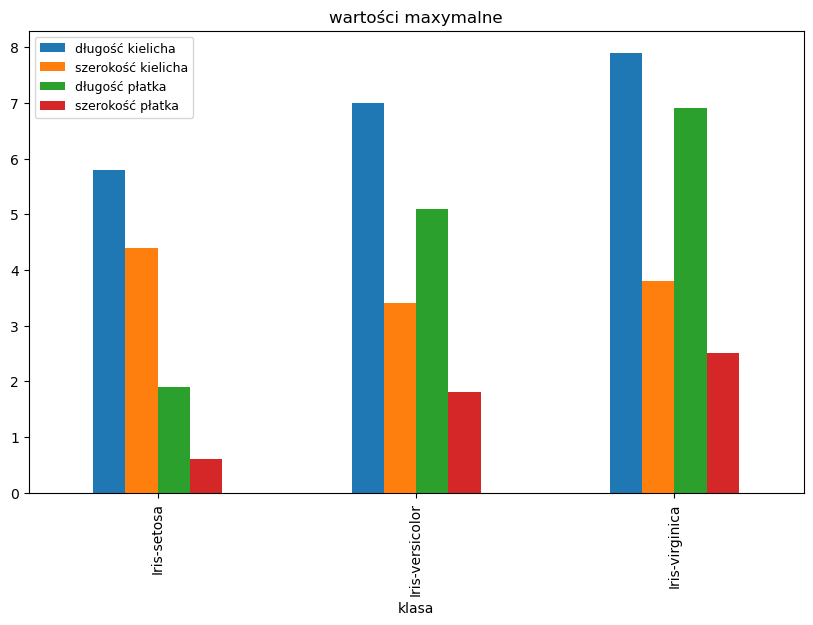

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))  # Define a single plot
df1.plot(kind='bar', x='klasa', y=['dl kielicha max', 'sz kielicha max','dl platka max',
                                   'sz platka max',],ax=ax, title='wartości maxymalne', legend=False)
ax.legend(['długość kielicha', 'szerokość kielicha', 'długość płatka', 'szerokość płatka'],fontsize=9)
plt.show()

Poniżej widzimy 3 wykresy typu heatmap po jednym dla każdego z gatunków irysa. Proszę zwrócić uwagę na fakt że wsystkie trzy macierze różnią sie od siebie. Przyjżymy się temu uważniej w podsumowaniu.

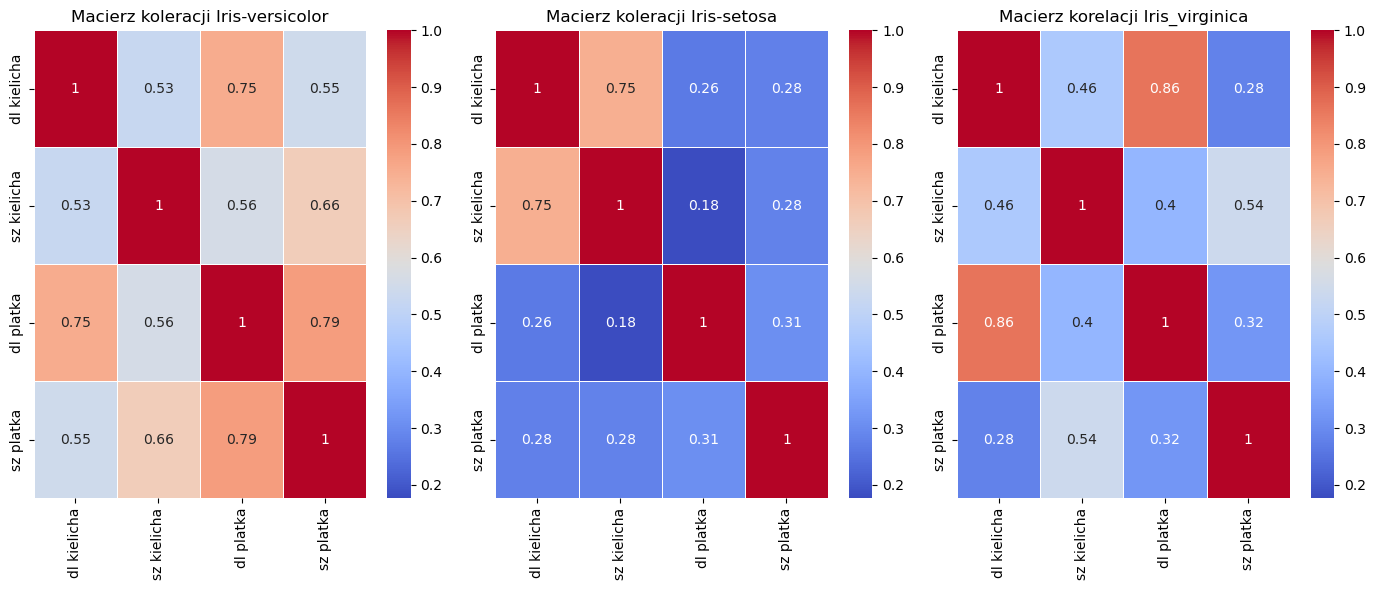

In [15]:
#Narysujmy sobie macierz koleracji dla każdej z klas irysa aby lepiej widzieć różnice pomiędzy gatunkami.
#Aby stworzyć ten wykres posłużłyem sie chat.gpt i bibliotką seaborn 
#Pandas nie ma macierzy a właśnie tego ptrzebowałem

#grupujemy dataframe klasami
df_Iris_setosa = df[df['klasa'] == 'Iris-setosa']
df_Iris_versicolor = df[df['klasa'] == 'Iris-versicolor']
df_Iris_virginica = df[df['klasa'] == 'Iris-virginica']

#wywalmy klumne klasa bo ni bedzie ona potrzebna do obliczenia koleracji
corr_Iris_setosa = df_Iris_setosa.drop(columns='klasa').corr()
corr_Iris_versicolor = df_Iris_versicolor.drop(columns='klasa').corr()
corr_Iris_virginica = df_Iris_virginica.drop(columns='klasa').corr()

#Upewnijmy się że skala kolorów jest taka sama dla każdej heatmapy
vmin = min(corr_Iris_setosa.min().min(), corr_Iris_versicolor.min().min(), corr_Iris_virginica.min().min())
vmax = max(corr_Iris_setosa.max().max(), corr_Iris_versicolor.max().max(), corr_Iris_virginica.max().max())

#podajemy wymiaty i układ wykresików
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Oraz wymiary każdej z macierzy
sns.heatmap(corr_Iris_setosa, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1],vmin=vmin, vmax=vmax)
axes[1].set_title('Macierz koleracji Iris-setosa')


sns.heatmap(corr_Iris_versicolor, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0],vmin=vmin, vmax=vmax)
axes[0].set_title('Macierz koleracji Iris-versicolor')


sns.heatmap(corr_Iris_virginica, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[2],vmin=vmin, vmax=vmax)
axes[2].set_title('Macierz korelacji Iris_virginica')


plt.tight_layout()


plt.show()

[ zdjęcie każdego z opisywanych gatunków Irysa ]

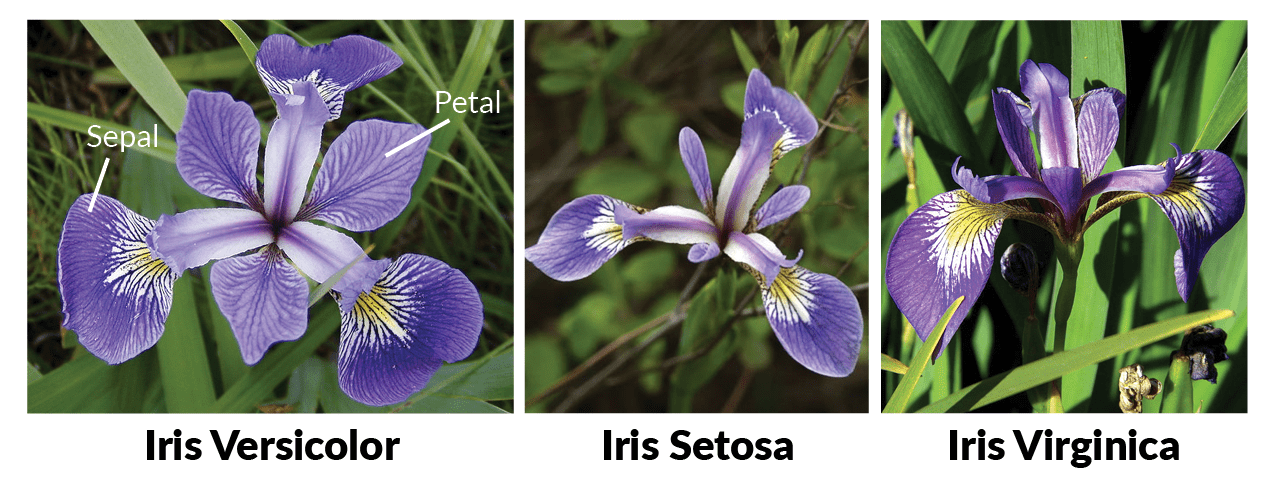

[ Porównajmy zdjęcia z wykresami heatmap i zastanówy się czy różnice w wymiarach widocznę są w środowisku naturalnym ]

# Podsumowanie

Po przeprowadzeniu analizy dochodzimy do następujących wniosków:

- Wszytkie trzy gatunki irysa różnią się od siebie rozmiarem(długościa i szerokością) płatka oraz długością kielicha. Irys Setosa posiada wyrażnie krótszy płatek oraz nieznacznie krótszy kielich. Virginica posiada największy płatek oraz najdłuższy kielich. Versicolor i Virginica różnią się rozmiarami płatka i bardzo nieznacznie rozmirami kielicha.  Należałoby powtórzyć badania na większej próbie aby móc jednoznacznie wykluczyć błąd statystyczny i potwierdzić różnice w rozmiarach Versicolor i Virginica.

- Opisne powyżej różnice są widoczne na całej próbie zarówno przy wartościach minimalnych średnich jak i maksymalnych z tego też powodu pominąłem w tym badaniu analize wartości odstających. Mówiąc językiem laika -  wszystkie badane kwiatki tego samego gatunku mają bardzo zbliżone wymiary.

-  Poszczególne gatunki różnią sie pomiędzy sobą długością i szerokością płatka oraz długościa kielicha. Natomiast 4 zmienna - serokość kielicha jest bardzo podobna u wszystkich gatunków - najdłuższa u Irys-satosa a więc odwrotnie proporconalnie do innych zmiennych. To powoduje że u każdego z gatunków występują odmmienne koleracje między zmiennymi co wyrażnie widać na wykresach typu heatmap powyżej.


 Ciekawe jest to że maszyna/algorytm analizjąc trzy powyższe macierze koleracji bez problemu mógłby rozpoznać wszystkie trzy gatunki i dojść do wniosku że niewątpliwie ma do czynienia z 3 odmiennymi gatunkami kwiatów. W rzeczywistości jednak patrząc na zdjęcia wszystkich trzech gatunków widzimy iż roróżnienie ich w środowisku naturalnym wymagałoby bardzo wnikliwej obserwacji. Powyższy zbiór danych nie zawiera takich zmiennych jak kolor czy ilość płatków. Zmienne te sprawiają że w naturalnych warunkach kwiaty wszytkich gatuków wyglądają bardzo podobnie i racze trudno je od siebie odróżnić.

-  Poszczególne gatunki różnią sie pomiędzy sobą długością i szerokością płatka oraz długościa kielicha. Natomiast 4 zmienna - serokość kielicha jest bardzo podobna u wszystkich gatunków - najdłuższa u Irys-satosa a więc odwrotnie proporconalnie do innych zmiennych. To powoduje że u każdego z gatunków występują odmmienne koleracje między zmiennymi co wyrażnie widać na wykresach typu heatmap powyżej.


 Ciekawe jest to że maszyna/algorytm analizjąc trzy powyższe macierze koleracji bez problemu mógłby rozpoznać wszystkie trzy gatunki i dojść do wniosku że niewątpliwie ma do czynienia z 3 odmiennymi gatunkami kwiatów. W rzeczywistości jednak patrząc na zdjęcia wszystkich trzech gatunków widzimy iż roróżnienie ich w środowisku naturalnym wymagałoby bardzo wnikliwej obserwacji. Powyższy zbiór danych nie zawiera takich zmiennych jak kolor czy ilość płatków. Zmienne te sprawiają że w naturalnych warunkach kwiaty wszytkich gatuków wyglądają bardzo podobnie i racze trudno je od siebie odróżnić.

In [17]:
!jupyter nbconvert Mateusz_N_zadanie_domowe__modul_4_zad_1.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Mateusz_N_zadanie_domowe__modul_4_zad_1.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 904489 bytes to Mateusz_N_zadanie_domowe__modul_4_zad_1.slides.html


In [18]:
!jupyter nbconvert Mateusz_N_zadanie_domowe__modul_4_zad_1.ipynb --to html --no-input --no-prompt --output Mateusz_N_zadanie_domowe__modul_4_zad_1_as_report.html

[NbConvertApp] Converting notebook Mateusz_N_zadanie_domowe__modul_4_zad_1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 906410 bytes to Mateusz_N_zadanie_domowe__modul_4_zad_1_as_report.html
